In [1]:
# kaggle, house price :https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview
import pandas as pd
train_df = pd.read_csv("h_train.csv", encoding="utf-8")
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2]:
test_df = pd.read_csv("h_test.csv", encoding="utf=8")
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


原本偏度: 1.880940746034036
救回的lambda: -0.05453791409973005


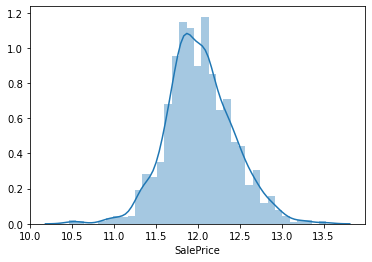

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#把右邊的資料做成常態分布, np.log1p 
import numpy as np
#sns.distplot(train_df["SalePrice"])
from scipy.stats import skew
from scipy.stats import boxcox_normmax
print("原本偏度:", skew(train_df["SalePrice"]))
print("救回的lambda:", boxcox_normmax(train_df["SalePrice"]+1))
sns.distplot(np.log1p(train_df["SalePrice"]))

現在偏度: 0.12122191311528363


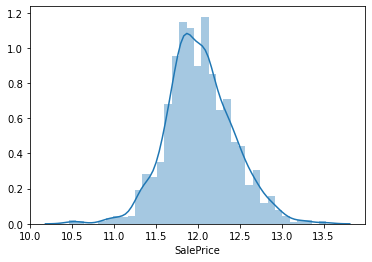

In [4]:
#如果lambda趨近於 0 時, 取 np.log1p做替代,
y_train = np.log1p(train_df["SalePrice"])
print("現在偏度:", skew(y_train))
sns.distplot(y_train)

In [5]:
# pandas裡面的 concat 合併兩個pdndas
#train_df 欄位不同數量 要先處理
train_df_drop = train_df.drop(["SalePrice"], axis=1)
datas = pd.concat([train_df_drop, test_df], axis=0)
datas = datas.drop(["Id"], axis=1)
datas

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [6]:
na = datas.isna().sum()
na[na != 0].sort_values(ascending=False)
datas = datas.drop(na[na > 1000].index, axis=1)

In [7]:
# 解救 x 
dt = datas.dtypes
col_num = dt[dt != "object"].drop(["MSSubClass"]).index
datas_skew = datas[col_num].apply(lambda s:skew(s.dropna()))
datas_skew.sort_values(ascending=False)

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.145323
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.929996
MasVnrArea        2.601240
OpenPorchSF       2.535114
WoodDeckSF        1.842433
LotFrontage       1.502351
1stFlrSF          1.469604
BsmtFinSF1        1.424989
GrLivArea         1.269358
TotalBsmtSF       1.162285
BsmtUnfSF         0.919351
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.623741
OverallCond       0.570312
BedroomAbvGr      0.326324
GarageArea        0.241176
OverallQual       0.197110
MoSold            0.195884
FullBath          0.167606
YrSold            0.132399
GarageCars       -0.218260
GarageYrBlt      -0.381942
YearRemodAdd     -0.451020
YearBuilt        -0.599806
dtype: float64

In [8]:
from scipy.special import boxcox1p
def norm(s):
    lamda = boxcox_normmax(s.dropna() + 1)
    return boxcox1p(s, lamda)

col_saved = datas_skew[datas_skew > 1].index
datas[col_saved] = datas[col_saved].apply(norm)
datas_skew = datas[col_saved].apply(lambda s:skew(s.dropna()))
datas_skew.sort_values(ascending=False)

c:\users\niel\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
c:\users\niel\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


PoolArea         14.985994
3SsnPorch         8.865144
LowQualFinSF      8.495602
MiscVal           5.239894
KitchenAbvGr      3.779896
BsmtHalfBath      3.779434
ScreenPorch       3.153911
BsmtFinSF2        2.578898
EnclosedPorch     2.150157
MasVnrArea        0.967387
WoodDeckSF        0.784768
OpenPorchSF       0.621025
BsmtFinSF1        0.374365
TotalBsmtSF       0.369784
LotFrontage       0.034596
GrLivArea         0.004848
1stFlrSF         -0.011611
LotArea          -0.135401
dtype: float64

In [9]:
# 因為我救不了他, 所以我丟了
datas = datas.drop(["PoolArea"], axis=1)
# 補缺失值
med = datas.median().drop(["MSSubClass"])
datas = datas.fillna(med)
# One-Hot
datas = pd.get_dummies(datas)
datas = pd.get_dummies(datas, columns=["MSSubClass"])
datas

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,12.913514,13.424522,7,5,2003,2003,19.495173,117.892049,0.0,150.0,...,0,0,0,0,0,0,0,0,0,0
1,14.416585,13.694529,6,8,1976,1976,0.000000,146.853608,0.0,284.0,...,0,0,0,0,0,0,0,0,0,0
2,13.227729,14.034135,7,5,2001,2002,17.823060,91.601461,0.0,434.0,...,0,0,0,0,0,0,0,0,0,0
3,12.372322,13.683423,7,5,1915,1970,0.000000,52.789070,0.0,540.0,...,1,0,0,0,0,0,0,0,0,0
4,14.791629,14.550144,8,5,2000,2000,25.496192,112.074246,0.0,490.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,6.893132,10.503898,4,7,1970,1970,0.000000,0.000000,0.0,546.0,...,0,0,0,0,0,0,0,1,0,0
1455,6.893132,10.463056,4,5,1970,1970,0.000000,58.643725,0.0,294.0,...,0,0,0,0,0,0,0,1,0,0
1456,20.642127,15.304043,5,7,1960,1996,0.000000,170.788361,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1457,12.591550,13.873788,5,5,1992,1992,0.000000,71.466795,0.0,575.0,...,0,0,0,1,0,0,0,0,0,0


In [10]:
# 取列: .iloc -> [第一筆資料, 第二筆資料...]
# y_train上面做過轉換
x_train = datas.iloc[:train_df.shape[0]]
x_predict = datas.iloc[train_df.shape[0]:]
predict_id = test_df["Id"]

In [11]:
#如何避免過擬合，不要讓演算法學的太好, 學的太好，每個點都考慮進去, 會產生考慮太多而過擬合
#如何定義學的好不好? 
# y=ax+b x是指有幾種變數，iris有四種x, a要怎找-->先隨便選一點, 再用MSE去判斷, 當數值越小的時候就表示調整的越好
# 與正確答案的距離 叫做 loss = MSE(最小時)+懲罰項(代價), 懲罰項有兩種，L1=|a1|+|a2|...用絕對值 ,叫做 lasso回歸,l1正則化, 把過多的欄位篩選掉不重要的,剩下重要的
# L2=a1平方+a2平方+..., L2 正則化, 哪一個欄位影響較大, 就限制這個欄位, 讓整體沒那麼預測的準確, 
#結論： L1:懲罰欄位過多, L2:懲罰過度依賴某個欄位, 可以一起做也可以分開做

In [12]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
datas_norm = pd.DataFrame(scaler.fit_transform(datas),
                                  columns=datas.columns)
datas_norm

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,-0.169570,-0.256138,0.5,0.0,0.631579,0.256410,1.089063,0.346983,0.0,-0.541880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.641578,0.035423,0.0,3.0,0.063158,-0.435897,0.000000,0.586503,0.0,-0.312821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.402140,0.5,0.0,0.589474,0.230769,0.995654,0.129553,0.0,-0.056410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.461629,0.023431,0.5,0.0,-1.221053,-0.589744,0.000000,-0.191435,0.0,0.124786,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.843974,0.959343,1.0,0.0,0.568421,0.179487,1.424299,0.298868,0.0,0.039316,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-3.418530,-3.409917,-1.0,2.0,-0.063158,-0.589744,0.000000,-0.628014,0.0,0.135043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2915,-3.418530,-3.454019,-1.0,0.0,-0.063158,-0.589744,0.000000,-0.143015,0.0,-0.295726,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2916,4.001254,1.773426,-0.5,2.0,-0.273684,0.076923,0.000000,0.784449,0.0,-0.798291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2917,-0.343321,0.228993,-0.5,0.0,0.400000,-0.025641,0.000000,-0.036965,0.0,0.184615,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
x_train = datas_norm.iloc[:train_df.shape[0]]
x_predict = datas_norm.iloc[train_df.shape[0]:]
predict_id = test_df["Id"]

In [16]:
from sklearn.linear_model import LassoCV, Lasso
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.linear_model import ElasticNetCV, ElasticNet
#用 LassoCV處理
cv = LassoCV(cv=10)
cv.fit(x_train, y_train)
print("Alpha:", cv.alpha_)
model = Lasso(cv.alpha_)
model.fit(x_train, y_train)
pre = model.predict(x_predict)
#expm1 ->loag1p反向
pre = np.expm1(pre)
result = pd.DataFrame({
    "ID":predict_id,
    "SalePrice:":pre
})
result.to_csv("lasso.csv", encoding="utf-8", index=False)
result

Alpha: 0.0006911174006105122


,ID,SalePrice:
0,1461,117047.626414
1,1462,152873.916812
2,1463,180019.663615
3,1464,200510.828432
4,1465,200534.165855
...,...,...
1454,2915,90477.311394
1455,2916,84652.308119
1456,2917,167200.426366
1457,2918,117473.965434


In [19]:
#用 Ridge方法處理
cv = RidgeCV(cv=10)
cv.fit(x_train, y_train)
print("Alpha:", cv.alpha_)
model = Ridge(cv.alpha_)
model.fit(x_train, y_train)
pre = model.predict(x_predict)
#expm1 ->loag1p反向
pre = np.expm1(pre)
result = pd.DataFrame({
    "ID":predict_id,
    "SalePrice:":pre
})
result.to_csv("redge.csv", encoding="utf-8", index=False)
result

Alpha: 10.0


,ID,SalePrice:
0,1461,115448.681588
1,1462,153461.298672
2,1463,179612.689961
3,1464,194743.899978
4,1465,203232.931506
...,...,...
1454,2915,85981.925746
1455,2916,80240.893386
1456,2917,163884.754094
1457,2918,116874.461317


In [20]:
#用 ElasticNetCV 處理
cv = ElasticNetCV(cv=10)
cv.fit(x_train, y_train)
print("Alpha:", cv.alpha_)
model = ElasticNet(cv.alpha_)
model.fit(x_train, y_train)
pre = model.predict(x_predict)
#expm1 ->loag1p反向
pre = np.expm1(pre)
result = pd.DataFrame({
    "ID":predict_id,
    "SalePrice:":pre
})
result.to_csv("elastic.csv", encoding="utf-8", index=False)
result

Alpha: 0.0007376571401022844


,ID,SalePrice:
0,1461,117374.678159
1,1462,153465.844960
2,1463,180683.607800
3,1464,198905.116812
4,1465,203140.611389
...,...,...
1454,2915,88258.734548
1455,2916,82202.113034
1456,2917,166239.241207
1457,2918,116428.021200
